## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [ ]:
X.isna().any().any()


False

In [ ]:
pd.get_dummies(X)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Пропусков нет

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size=0.3, random_state=10, stratify=y)


Stratify необходим для того, чтобы мы в равной доле одинаково хорошо могли обучиться на каждом значении таргета. Распределяем именно по таргету, потому что если у тагрета 50% значений "x", то и в обучающей выборке должно быть 50% значений "х", иначе выборка нерелеватна. В наших датасетах отношение test к train колеблется у 0.44 для каждого класса.

In [ ]:
print(np.bincount(y_train))#количество элементов каждого класса
print(np.bincount(y_test))


[41 50 33]
[18 21 15]


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
X_stand = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(data=X_stand,columns = data['feature_names'])
X_stand = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(data=X_stand,columns = data['feature_names']) #Нормализовали признаки у train и test

res = []
clfs = []

for i in [1,3, 5, 10, 15, 25]:#Цикл для перебора всех n_neighbours
  clf = KNeighborsClassifier(n_neighbors=i).fit(X_train[['alcohol', 'magnesium']], y_train)#Обучаем
  y_pred_tr = clf.predict(X_train[['alcohol', 'magnesium']])#Предиктим
  clfs.append(clf)#Сохраняем результат и повторям для теста
  y_pred_test = KNeighborsClassifier(n_neighbors=i).fit(X_train[['alcohol', 'magnesium']], y_train).predict(X_test[['alcohol', 'magnesium']])
  res.append([np.mean(y_train == y_pred_tr),np.mean(y_test == y_pred_test)])

In [ ]:
pd.DataFrame(data=res, columns=['Train', 'Test'], index = [1,3,5,10,15,25])

,Train,Test
1,1.000000,0.722222
3,0.790323,0.759259
5,0.741935,0.685185
10,0.741935,0.777778
15,0.709677,0.833333
25,0.725806,0.833333


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

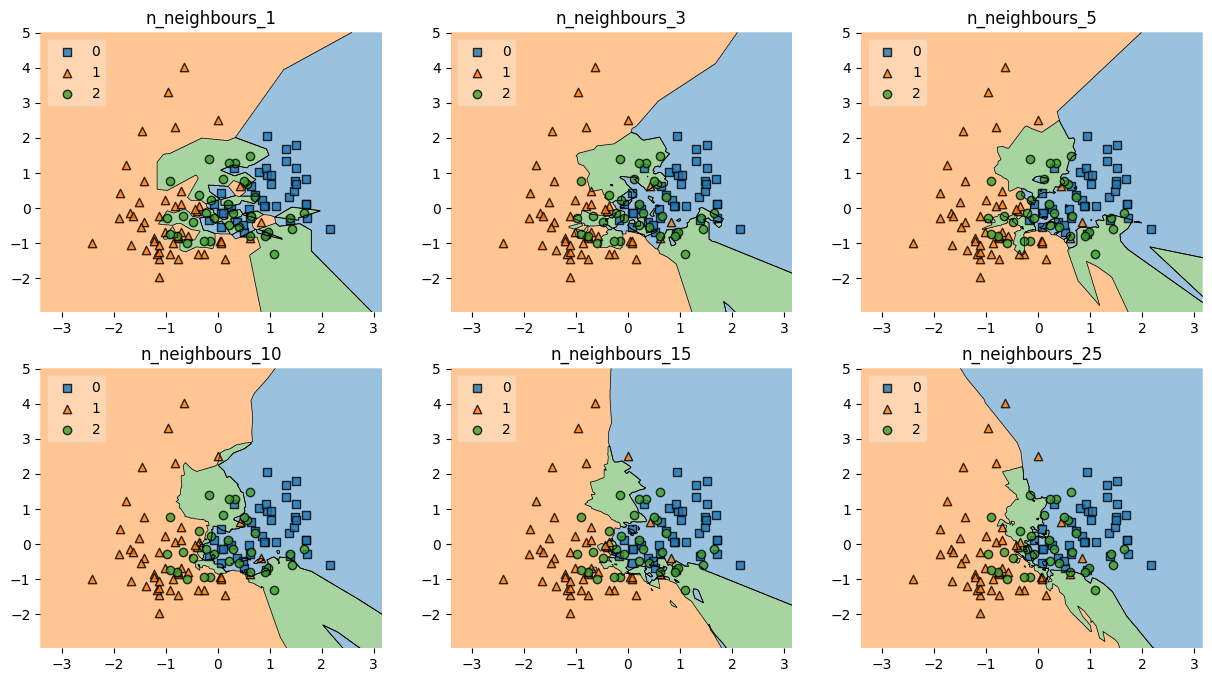

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(15, 8))

labels = ['n_neighbours_1', 'n_neighbours_3', 'n_neighbours_5', 'n_neighbours_10', 'n_neighbours_15', 'n_neighbours_25']
for clf, lab, grd in zip(clfs,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X_train[['alcohol', 'magnesium']]), y=np.array(y_train), clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Можем заметить, что при n = 1 модель преобучивается. Она показывает 100% результат на тренировочной выборке, но относительно плохо подходит для работы с новыми данными. Это можно видеть и на графике: один элемента класса "1" уже согласно модели гарантирует нам что в этой области характерно располажение элементов класса "1", даже если один эkемент просто выброс.
Если посмотреть по таблице, то в нашем сиде точность на тестовой выборке самая высокая при n = 15, затем она уже не улучшает результат. Если смотреть по визуализации, то только n<=5 позволяет нам не игнорировать большое скопление элементов класса "2" среди элементов класса "1" (в левой нижней части графика), поэтому можем сделать вывод, что  нам не подходят крайние значения n и лучше ориентироваться на n = 5-10


### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

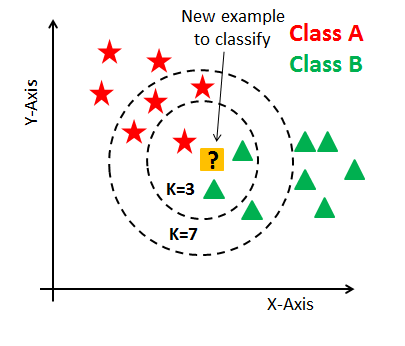

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.X_tr = np.array(X)
      self.y_tr =np.array(y)

    def predict(self, X):
      a = []
      for j in X:#Для всех необходимых знечений теста
        dist =[]
        res = []
        for i in self.X_tr:#Сначала вычисляем расстояния
          dist.append(self.count_distance(i, j))
        for i in range(self.k):#Затем ищем минимальные
          min_i = dist.index(min(dist))
          res.append(self.y_tr[min_i])
          dist[min_i] =  max(dist)
        a.append(list(Counter(res).keys())[0])#Сохраняем минимальные знаечения
      return np.array(a)

    def count_distance(self, x, y):
      return(np.linalg.norm(x-y))

In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
del data['Unnamed: 0']
data.isna().any().any()

False

**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
data.corr()

<ipython-input-18-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


С целевой переменной price больше всего коррелирует признак carat (что в целом звучит логично),  затем можем заметить высокую корреляцию и у переменных x, y, z с ценой, они отвечают за длину, ширину и высоту бриллианта, поэтому корреляция тоже вполне очевидна

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
data=pd.get_dummies(data)

**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [ ]:
X_train, X_test = train_test_split ( data, test_size=0.3, random_state=10)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
features = ['carat',	'depth',	'table', 'x',	'y',	'z']
scaler = StandardScaler()
scaler.fit(X_train[features])
X_train[features] = scaler.transform(X_train[features])#Масштабируем вещественные признаки тренировочной выборки

scaler.fit(X_test[features])
X_test[features] = scaler.transform(X_test[features])#Масштабируем вещественные признаки тестовой выборки

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
X_lin = X_train.drop('price', axis=1)#Датасет с масштабированными признаками тренировочной выборки без цены

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression().fit(X_lin, X_train['price'])
pred = reg.predict(X_lin)
print('MSE train:',mean_squared_error(pred,X_train['price']))
pred = reg.predict(X_test.drop('price', axis=1))#Датасет с масштабированными признаками тестовой выборки
print('MSE test:',mean_squared_error(pred,X_test['price']))

MSE train: 1268454.955961559
MSE test: 1315908.3592285893


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
reg.coef_

array([ 5268.33484547,   -73.1113    ,   -67.58876012,  -959.00197931,
          80.66323539,  -238.038613  ,  -608.9842503 ,    16.66815822,
         251.84164281,   184.84981128,   155.624638  ,   810.16549896,
         605.84772546,   541.91097169,   342.24450789,  -158.78346849,
        -632.33579255, -1509.04944296, -3847.02419567,  1519.24204362,
        -143.27826691, -1102.45932839,   776.42704839,   460.5320942 ,
        1199.41410651,  1137.14649826])

Самый высокий коэффициент у карата(положительный) и у самой низкой чистоты(отрицатпельный)

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
clf = Lasso(alpha=10)
clf.fit(X_lin, X_train['price'])
print('Lasso:', clf.coef_)
clf = Ridge(alpha=10)
clf.fit(X_lin, X_train['price'])
print('Ridge:', clf.coef_)

Lasso: [ 4814.63647045   -89.05106507   -86.45255252  -528.08718517
    -0.          -208.75531897  -468.79496109   -22.12011407
    80.99035005     0.             0.           320.13716823
   156.24838384   104.09062115    -0.          -442.33549616
  -847.35009315 -1616.65085287 -3562.6723794    665.50108932
  -630.35960642 -1529.81091545   160.48304328   -18.94302454
   516.16024457   503.46351673]
Ridge: [ 5231.42555479   -71.20618978   -67.92414844  -908.55952871
    72.25800634  -246.84941625  -611.51528193    16.69278037
   252.95531838   184.57410997   157.29307321   805.38456522
   602.23912888   538.3791212    340.65729904  -159.15356078
  -629.24904475 -1498.2575088  -3770.54190739  1499.00383655
  -151.76888979 -1106.69197898   765.83368476   451.52750643
  1186.84255527  1125.79519314]


**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.180e+07, tolerance: 5.933e+07
  model = cd_fast.enet_coordinate_descent(


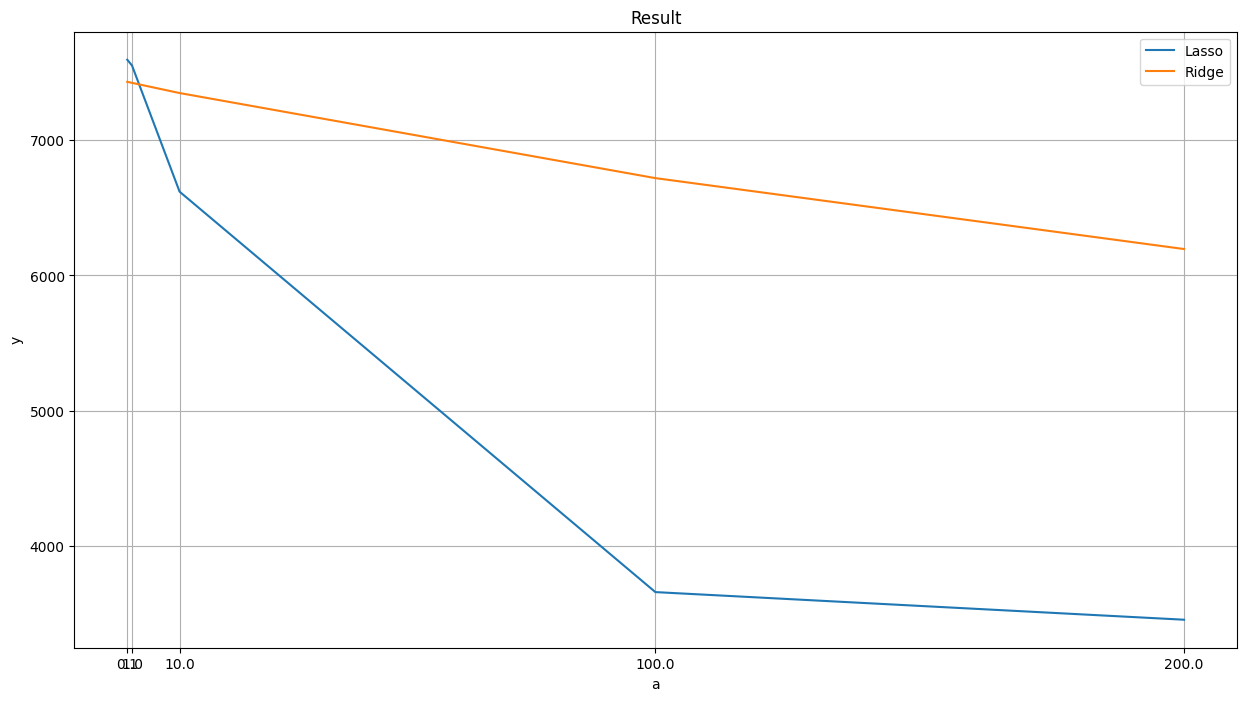

In [ ]:
a = []
b = []
x = [0.1, 1, 10, 100, 200]

for i in x:
    lasso = linear_model.Lasso(i).fit(X_lin, X_train['price'])
    a.append(np.linalg.norm(lasso.coef_))
    ridge = Ridge(i).fit(X_lin, X_train['price'])
    b.append(np.linalg.norm(ridge.coef_))

plt.figure(figsize=(15, 8))
plt.plot(x, a, label='Lasso')
plt.plot(x, b, label='Ridge')
plt.legend()
plt.xticks([0.1, 1, 10, 100, 200])
plt.xlabel('a')
plt.ylabel('y')
plt.title('Result')
plt.grid(True)
plt.show()

Lasso уменьшает веса гораздо агрессивнее, по сравнению с Ridge, она гораздо быстрее выявляет зависимые признаки

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
lasso = LassoCV(cv=5, alphas = [0.1,10,100,200], max_iter=10000).fit(X_lin, X_train['price'])
a = reg.mse_path_.mean(axis =1)
print('MSE:', a)
print('Alpha',reg.alphas_)
print( 'Лучшая ошибка у альфа =', reg.alphas_[list(a).index(min(a))])

MSE: [2413829.95860301 2197445.38994689 1308720.30978837 1272761.71297679]
Alpha [2.e+02 1.e+02 1.e+01 1.e-01]
Лучшая ошибка у альфа = 0.1


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
lasso = Lasso(0.1,  max_iter=10000).fit(X_lin, X_train['price'])
lasso.coef_

array([ 5263.9214694 ,   -73.60749014,   -67.80244985,  -946.97082509,
          69.79904526,  -235.54698862,  -762.48292692,  -138.07142827,
          95.69469576,    28.0492609 ,     0.        ,   466.51570753,
         262.62528482,   198.78185492,     0.        ,  -500.40253108,
        -973.26079655, -1848.89604234, -4392.57755543,   962.52553622,
        -696.39496102, -1654.9986275 ,   222.08890912,   -92.49853741,
         644.35486066,   582.58167475])

Cамым высоким все еще остался карат. Несильно уменьшились и признаки, отвечающие за размеры камня. Однако можно заметить, что признаки, связанные с огранкой и цветом достаточно сильно просели по весам

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
print('MSE Lasso on train:', mean_squared_error(lasso.predict(X_lin), X_train['price']))
print('MSE Lasso on test:', mean_squared_error(lasso.predict(X_lin), X_train['price']))

MSE Lasso on train: 1268460.7337502711
MSE Lasso on test: 1268460.7337502711


Напомню что у регрессии MSE на train: 1268454.955961559, и на test: 1315908.3592285893. У Lasso-регрессии немного ниже ошибка на train и явно ниже на test, что говорит о том, что эту модель однозначно стоит выбрать для предсказаний. Возможно, такая разница обусловлена тем что Lasso-регрессия не так реагирует на выбросы или чрезмерную корреляцию каких-то независимых переменных друг с другом.

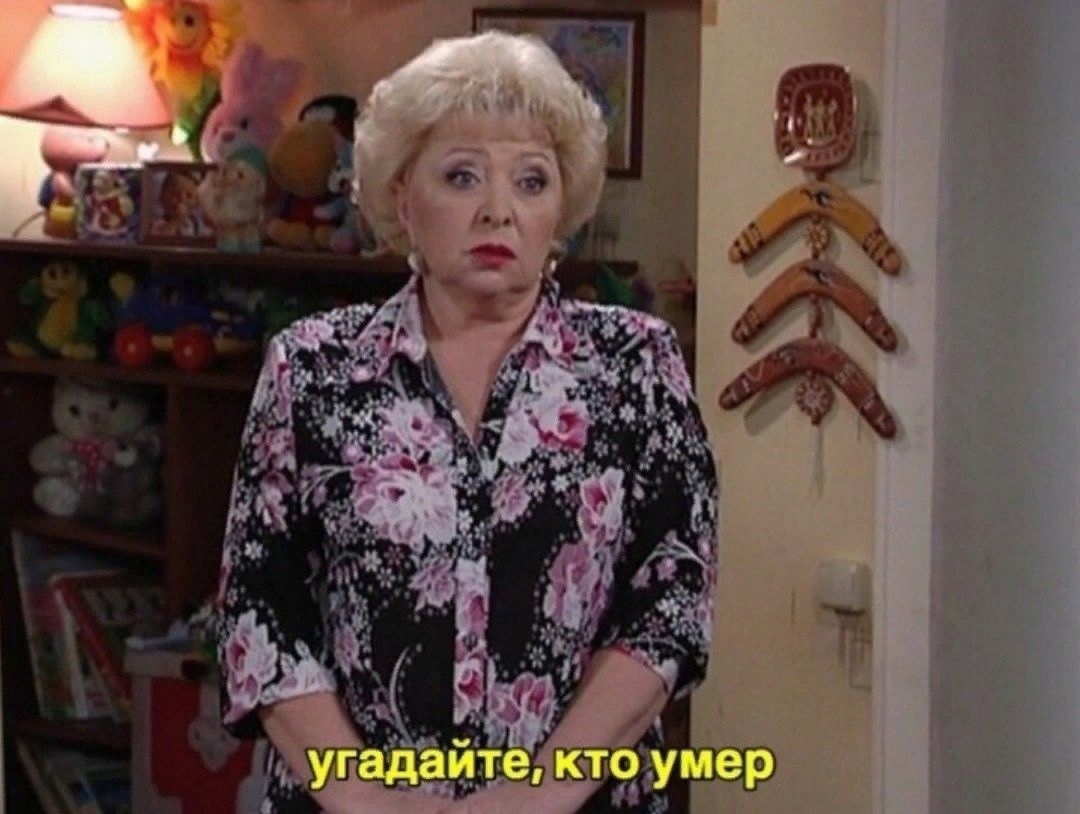